**Immigration to Canada from Eastern Europe during 1980 - 2013**

Analysis by decades

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
#also needed: openpyxl (install by pip)

In [2]:
from dataset import *

                    Continent          Region  1980  1981  1982  1983  1984  \
Country                                                                       
Poland                 Europe  Eastern Europe   863  2930  5881  4546  3588   
Romania                Europe  Eastern Europe   375   438   583   543   524   
Russian Federation     Europe  Eastern Europe     0     0     0     0     0   
Ukraine                Europe  Eastern Europe     0     0     0     0     0   
Bulgaria               Europe  Eastern Europe    24    20    12    33    11   
Hungary                Europe  Eastern Europe   205   310   397   337   310   
Republic of Moldova    Europe  Eastern Europe     0     0     0     0     0   
Belarus                Europe  Eastern Europe     0     0     0     0     0   
Slovakia               Europe  Eastern Europe     0     0     0     0     0   
Czech Republic         Europe  Eastern Europe     0     0     0     0     0   

                     1985  1986  1987  ...  2005  2

c:\Users\krzys\Desktop\venv\Projekty\01-Immigration_CA\dataset.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset['Total'] = dataset.sum(axis=1)


**Analysis**

Distribution of immigration to Canada from top 5 Eastern Europe countries grouped by the decades: 1980s, 1990s, 2000s.

In [3]:
df_top5_dec = datasetEE.sort_values(['Total'], ascending=False, axis=0).head()
df_top5_dec

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Poland,Europe,Eastern Europe,863,2930,5881,4546,3588,2819,4808,6931,...,1405,1263,1235,1267,1013,795,720,779,852,139241
Romania,Europe,Eastern Europe,375,438,583,543,524,604,656,1202,...,5048,4468,3834,2837,2076,1922,1776,1588,1512,93585
Russian Federation,Europe,Eastern Europe,0,0,0,0,0,0,0,0,...,3972,3117,2983,2690,2931,2288,1963,2079,2466,63344
Ukraine,Europe,Eastern Europe,0,0,0,0,0,0,0,0,...,2270,1973,2218,1937,2367,3159,2515,2265,2487,51410
Bulgaria,Europe,Eastern Europe,24,20,12,33,11,24,33,52,...,1738,1419,1172,994,784,556,365,451,512,23310


In [4]:
y_80s = list(map(str, range(1980, 1990)))
y_90s = list(map(str, range(1990, 2000)))
y_00s = list(map(str, range(2000, 2010)))

df_80s = df_top5_dec.loc[:, y_80s].sum(axis=1)
df_90s = df_top5_dec.loc[:, y_90s].sum(axis=1)
df_00s = df_top5_dec.loc[:, y_00s].sum(axis=1)

new_df_dec = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s': df_00s})

new_df_dec

,1980s,1990s,2000s
Country,,,
Poland,57602,64864,13629
Romania,7613,33659,45515
Russian Federation,0,19013,35535
Ukraine,0,14644,26340
Bulgaria,337,7481,13608


In [5]:
new_df_dec.describe()

,1980s,1990s,2000s
count,5.000000,5.000000,5.000000
mean,13110.400000,27932.200000,26925.400000
std,25083.105874,22754.856947,13912.121776
min,0.000000,7481.000000,13608.000000
25%,0.000000,14644.000000,13629.000000
50%,337.000000,19013.000000,26340.000000
75%,7613.000000,33659.000000,35535.000000
max,57602.000000,64864.000000,45515.000000


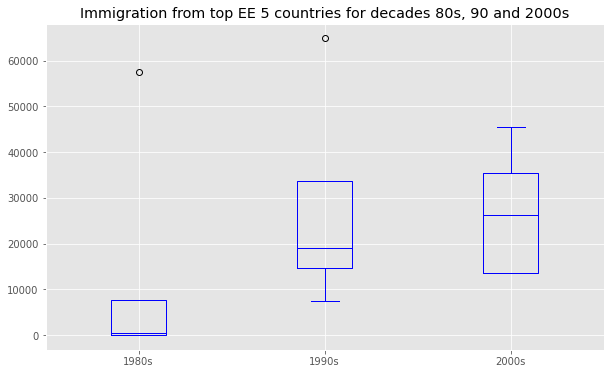

In [8]:
new_df_dec.plot(kind='box', figsize=(10, 6), color='blue')

plt.title('Immigration from top EE 5 countries for decades 80s, 90 and 2000s')

plt.show()

In [10]:
# Check upper bound outliers for 90s.
# Q3 for 90s = 33,659
# IQR = 33,659 - 14,644 = 19,015

# Outlier > 33,659 + (1.5 * 19,015)
# Outlier > 62,182

new_df_dec = new_df_dec.reset_index()
new_df_dec[new_df_dec['1990s'] > 62182]  # shows how many entries fall above the outlier threshold

,index,Country,1980s,1990s,2000s
0,0,Poland,57602,64864,13629
